In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadoK2.xlsx'
data = pd.read_excel(file_path)
#data = pd.read_excel('c:\andre\consolidado.xlsx', sheet_name='Sheet1')

# Assuming the last column is the target/output column
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




[0.00150989 0.1445468  0.00415012 0.00499766 0.00237808 0.00600979
 0.00350414 0.02977694 0.78714146 0.01598514]


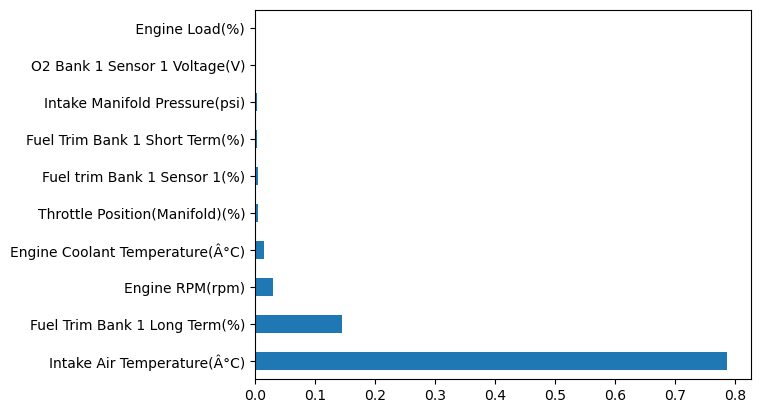

Características selecionadas: Index([' Engine Load(%)', 'Fuel Trim Bank 1 Long Term(%)',
       'Throttle Position(Manifold)(%)', 'Engine RPM(rpm)',
       'Intake Air Temperature(Â°C)'],
      dtype='object')
Acurácia com características selecionadas: 0.67003367003367


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
X.head()
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()




In [29]:
from sklearn.feature_selection import f_classif
import numpy as np
import pandas as pd

# Aplicando ANOVA
f_values, p_values = f_classif(X, y)

# Resultados
anova_results = pd.DataFrame({
    "Feature": X.columns,
    "F-Value": f_values,
    "P-Value": p_values
})

print("Resultados da ANOVA:")
anova_results_sorted = anova_results.sort_values(by="F-Value", ascending=False)

print(anova_results_sorted)


Resultados da ANOVA:
                           Feature      F-Value        P-Value
8      Intake Air Temperature(Â°C)  4758.957571   0.000000e+00
7                  Engine RPM(rpm)   325.806900  9.040422e-131
9  Engine Coolant Temperature(Â°C)   314.751811  1.075493e-126
1    Fuel Trim Bank 1 Long Term(%)    89.695334   9.683772e-39
3     Fuel trim Bank 1 Sensor 1(%)    79.427703   1.757863e-34
2   Fuel Trim Bank 1 Short Term(%)    77.098057   1.638876e-33
5   Throttle Position(Manifold)(%)    32.951756   6.588004e-15
0                   Engine Load(%)    12.846213   2.759249e-06
6    Intake Manifold Pressure(psi)    11.934356   6.824893e-06
4    O2 Bank 1 Sensor 1 Voltage(V)     3.058639   4.707370e-02


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


# Modelo base
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Seleção de características com RFE
rfe = RFE(estimator=model, n_features_to_select=5)  # Selecionar 2 características
rfe.fit(X_train, y_train)

# Características selecionadas
print("Características selecionadas:", X.columns[rfe.support_])

# Avaliar o modelo com as características selecionadas
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

model.fit(X_train_rfe, y_train)
y_pred = model.predict(X_test_rfe)

print("Acurácia com características selecionadas:", accuracy_score(y_test, y_pred))
